In [ ]:
from pathlib import Path
Path.cwd()

In [2]:
import pandas as pd

In [3]:
data = {
    "Name":['Alice','Bob','Charlie'],
    "Age":[26,50,34],
    "City":['Chicago','LA','San Francisco']
}
df = pd.DataFrame(data)

In [10]:
value = {'Age': [50], 'City': ['Chicago']}
df[~df.isin(value) ]

,Name,Age,City
0,Alice,26.0,NaN
1,Bob,NaN,LA
2,Charlie,34.0,San Francisco


In [4]:
#select column
name = df['Name']
name

0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object

In [8]:
#filter data
print(df[df.Age >30])
print(df[df.City == 'LA'])

      Name  Age           City
1      Bob   50             LA
2  Charlie   34  San Francisco
  Name  Age City
1  Bob   50   LA


In [18]:
#filter data &: AND |: OR ~: NOT
print(df[ (df["Age"] >30) & (df["City"] == 'LA')])
print(df[df["City"] == 'LA'])

  Name  Age City
1  Bob   50   LA
  Name  Age City
1  Bob   50   LA


In [22]:
city = ['LA','Chicago']
#df.loc[df.City.isin(city)]
df[df.City.isin(city)]

,Name,Age,City
0,Alice,26,Chicago
1,Bob,50,LA


In [25]:
city = df.City.isin(['LA','Chicago'])
age = df.Age.isin([26])
df[city | age]

,Name,Age,City
0,Alice,26,Chicago
1,Bob,50,LA


In [41]:
df.query("City == 'Chicago' & Age == 26")
#filtered_df = df.query("City == 'Chicago' & Age < 30")
#filtered_df

,Name,Age,City
0,Alice,26,Chicago


In [7]:
numbers = [1, 2, 3, 4, 5, 6]
# Filter for numbers greater than 3 using a lambda
#filtered_list = list(
list(filter(lambda x: x > 3, numbers))

[4, 5, 6]

In [42]:
#create new column and give valuee
df['Country'] = 'USA'

In [43]:
df.head()

,Name,Age,City,Country
0,Alice,26,Chicago,USA
1,Bob,50,LA,USA
2,Charlie,34,San Francisco,USA


In [46]:
#replace value in column
df.loc[df.City == 'LA','Country'] = 'India'

In [47]:
df

,Name,Age,City,Country
0,Alice,26,Chicago,USA
1,Bob,50,LA,India
2,Charlie,34,San Francisco,USA


In [48]:
#another way to replace some value in a column
df.Country = df.Country.replace({'India':'USA'})

In [49]:
df

,Name,Age,City,Country
0,Alice,26,Chicago,USA
1,Bob,50,LA,USA
2,Charlie,34,San Francisco,USA


In [50]:
df.Age = df.Age.replace({26:28})
df

,Name,Age,City,Country
0,Alice,28,Chicago,USA
1,Bob,50,LA,USA
2,Charlie,34,San Francisco,USA


In [53]:
df.loc[df.Age ==28,'Age'] =26
df

,Name,Age,City,Country
0,Alice,26.0,Chicago,USA
1,Bob,50.0,LA,USA
2,Charlie,34.0,San Francisco,USA
df.Age =28,NaN,26.0,NaN,NaN


In [54]:
df = df.dropna(axis=0) #delete rows where NA
df

,Name,Age,City,Country
0,Alice,26.0,Chicago,USA
1,Bob,50.0,LA,USA
2,Charlie,34.0,San Francisco,USA


In [55]:
df.Age.max()

50.0

In [56]:
df.Age.min()

26.0

In [59]:
df.Age.mode()

0    26.0
1    34.0
2    50.0
Name: Age, dtype: float64

In [79]:
new_row = {"Name":"Abc1", "Age":"" , "City":"New York1", "Country":""}
new_row_df = pd.DataFrame([new_row])

In [80]:
df = pd.concat([df,new_row_df])

In [82]:
df

,Name,Age,City,Country
0,Alice,26.0,Chicago,USA
1,Bob,50.0,LA,USA
2,Charlie,34.0,San Francisco,USA
0,Abc,NaN,New York,NaN
0,Abc,NA,New York,NA
0,Abc1,,New York1,


In [83]:
df.isna().sum()


Name       0
Age        0
City       0
Country    0
dtype: int64

In [73]:
df.dropna()

,Name,Age,City,Country
0,Alice,26.0,Chicago,USA
1,Bob,50.0,LA,USA
2,Charlie,34.0,San Francisco,USA
0,Abc,NaN,New York,NaN


In [84]:
df.columns

Index(['Name', 'Age', 'City', 'Country'], dtype='object')

In [85]:
new_columns = []
for i in df.columns:
    new_columns.append(i.lower())
    
df.columns = new_columns

In [88]:
df.columns

Index(['Name', 'Age', 'City', 'Country'], dtype='object')

In [87]:
df = df.rename(columns=str.capitalize)

In [ ]:
renme = {"Age" : "age","City":"city"}

df.rename(columns = renme,inplace =True)

In [90]:
df.duplicated().sum()

0

In [91]:
df.Country = df.Country.apply(lambda x: x.replace("A","B")) # use apply() for changing rows data using lambda

In [94]:
df.columns = df.columns.map(lambda x: x.lower()) #map() to change column names

In [96]:
df.columns = df.columns.map(lambda x: x.capitalize())

In [105]:
df.Age = df.Age.apply(lambda x: str(x).replace("NaN",'40'))
df.Age = df.Age.apply(lambda x: str(x).replace("NA",'45'))
df.Age = pd.to_numeric(df.Age)


In [99]:
df.Age = df.Age.fillna(40)

In [109]:
df['GDP']  = 1000
df['GDP1']  = 10000
df['GDP2']  = 100000

In [113]:
columne = ['GDP','GDP1','GDP2']
df1 = df.drop(columns= columne, axis=1)
df1

,Name,Age,City,Country
0,Alice,26.0,Chicago,USB
1,Bob,50.0,LA,USB
2,Charlie,34.0,San Francisco,USB
0,Abc,40.0,New York,NaN
0,Abc,45.0,New York,NB
0,Abc1,NaN,New York1,


In [125]:

df1.duplicated().value_counts()
df1

,Name,Age,city,Country
0,Alice,26.0,Chicago,USB
1,Bob,50.0,LA,USB
2,Charlie,34.0,San Francisco,USB
0,Abc,40.0,New York,NaN
0,Abc,45.0,New York,NB
0,Abc1,NaN,New York1,


In [ ]:
df1.drop_duplicates(inplace=True)
df1.reset_index()

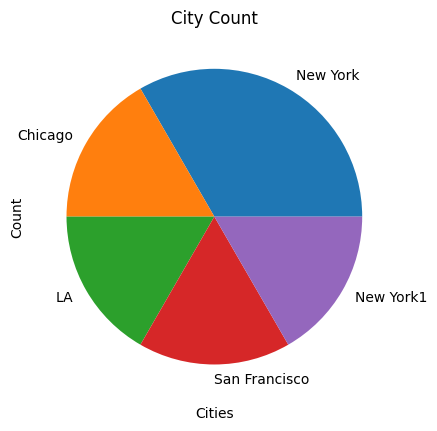

In [124]:
import matplotlib.pyplot as plt
df1.city.value_counts().plot(kind = "pie")
plt.title("City Count")
plt.xlabel("Cities")
plt.ylabel("Count")
plt.show()

In [126]:
df1.isna().sum()

Name       0
Age        1
city       0
Country    0
dtype: int64

In [127]:
df1.dropna(inplace=True)
df1

,Name,Age,city,Country
0,Alice,26.0,Chicago,USB
1,Bob,50.0,LA,USB
2,Charlie,34.0,San Francisco,USB
0,Abc,40.0,New York,NaN
0,Abc,45.0,New York,NB


In [137]:
df1.reset_index(inplace=True)

In [140]:
type(df1.Country[3])

str

In [141]:
df2 = df1[df1.Country != "NaN"]
df2

,index,Name,Age,city,Country
0,0,Alice,26.0,Chicago,USB
1,1,Bob,50.0,LA,USB
2,2,Charlie,34.0,San Francisco,USB
4,0,Abc,45.0,New York,NB


In [142]:
df1.Country = df1.Country.replace("NaN","No Country")
df1

,index,Name,Age,city,Country
0,0,Alice,26.0,Chicago,USB
1,1,Bob,50.0,LA,USB
2,2,Charlie,34.0,San Francisco,USB
3,0,Abc,40.0,New York,No Country
4,0,Abc,45.0,New York,NB


In [143]:
df1.Country = df1.Country.replace("NB","")
df1

,index,Name,Age,city,Country
0,0,Alice,26.0,Chicago,USB
1,1,Bob,50.0,LA,USB
2,2,Charlie,34.0,San Francisco,USB
3,0,Abc,40.0,New York,No Country
4,0,Abc,45.0,New York,


In [146]:
df1.Country = df1.Country.replace("","USA")
df1.drop(columns = "index")

,Name,Age,city,Country
0,Alice,26.0,Chicago,USB
1,Bob,50.0,LA,USB
2,Charlie,34.0,San Francisco,USB
3,Abc,40.0,New York,No Country
4,Abc,45.0,New York,USA


In [154]:
new_rows = {"Name":"Ashok" , "Age":15,"city":"Delhi","Country":"India"}
new_rows = pd.DataFrame([new_rows])
df1 = pd.concat([df1,new_rows])
df1

,index,Name,Age,city,Country
0,0.0,Alice,26.0,Chicago,USB
1,1.0,Bob,50.0,LA,USB
2,2.0,Charlie,34.0,San Francisco,USB
3,0.0,Abc,40.0,New York,No Country
4,0.0,Abc,45.0,New York,USA
0,NaN,Ashok,15.0,Delhi,India
0,NaN,Ashok,15.0,Delhi,India


In [155]:
df1.query("Name == 'Ashok'")

,index,Name,Age,city,Country
0,NaN,Ashok,15.0,Delhi,India
0,NaN,Ashok,15.0,Delhi,India


In [157]:
df1.loc[df1.duplicated("Name")] #find duplicated rows or find duplicates on some column Name

,index,Name,Age,city,Country
0,NaN,Ashok,15.0,Delhi,India


In [167]:
df2 = df1.loc[~df1.duplicated()] #filter rows which are not duplicated
df2.reset_index()
df2.drop(columns = "index")

,Name,Age,city,Country
0,Alice,26.0,Chicago,USB
1,Bob,50.0,LA,USB
2,Charlie,34.0,San Francisco,USB
3,Abc,40.0,New York,No Country
4,Abc,45.0,New York,USA
0,Ashok,15.0,Delhi,India


<Axes: title={'center': 'Age Plot'}, ylabel='Frequency'>

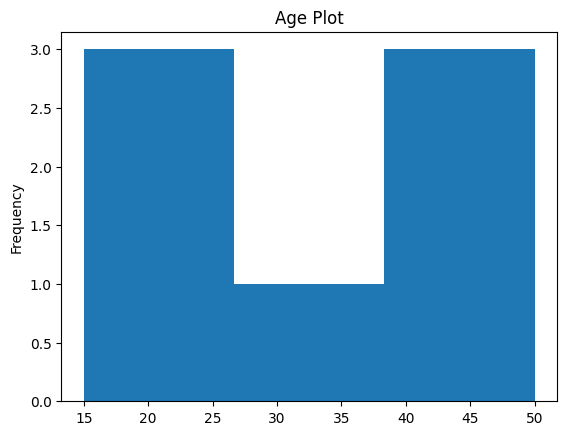

In [170]:
df1.Age.plot(kind = "hist" ,bins=3, title = "Age Plot")

<Axes: title={'center': 'Age Plot'}, xlabel='Country', ylabel='Age'>

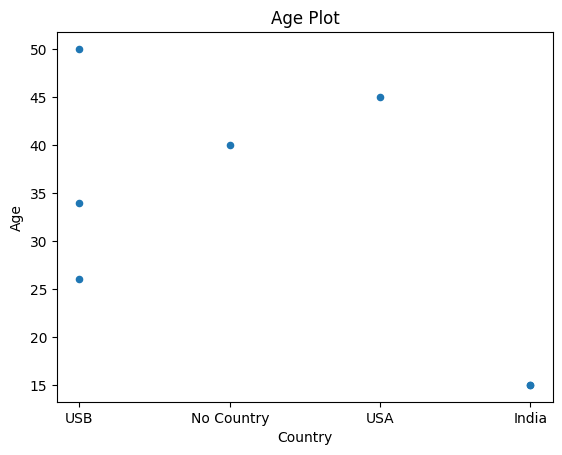

In [172]:
df1.plot(kind = "scatter" ,x="Country", y= "Age", title = "Age Plot")

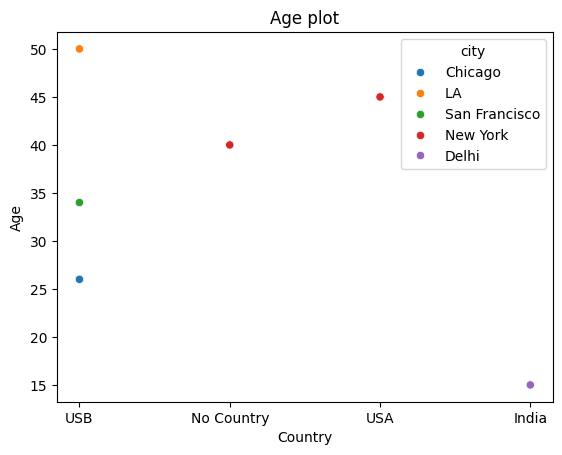

In [180]:
import seaborn as sns
asx = sns.scatterplot(x="Country", y= "Age",hue= "city", data = df2)
asx.set_title("Age plot")
plt.show()


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

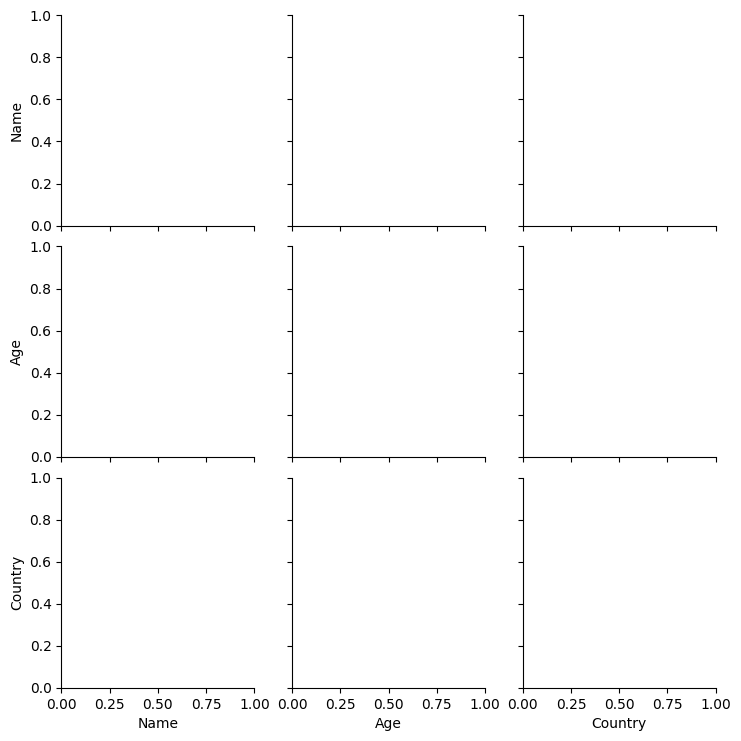

In [182]:
sns.pairplot(df2, vars = ["Name", "Age", "Country"],hue= "city")

In [ ]:
df_corr = df[['Year_Introduced','Speed_mph',
    'Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

In [ ]:
sns.heatmap(df_corr, annot=True)

In [ ]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()

In [ ]:
#time series data analysis:

df['Date'] = pd.to_datetime(df['Date']) #convert dates to date time format for python
df.set_index('Date', inplace=True) #create index of date
df.head()

df.info()
df.describe()

df.isnull().sum()

#time series plot:
plt.figure()
df['Close'].plot()  #line plot with year
plt.title('Toyota Stock Closing Price (1980–2024)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

#histogram plot of different variables
df[['Open','High','Low','Close','Adj_Close']].hist(figsize=(10,8))
plt.show()


#correlation
df.corr() #if all variables are numeric, filter if some are category by df[[]]

df_corr = df[['Year_Introduced','Speed_mph',
    'Height_ft','Inversions','Gforce']].dropna().corr()

#create heatmap of correlation
sns.heatmap(df_corr, annot=True)

#sorting data
df.sort_values(by=['ounces'],ascending=True,inplace=False)
#sorting on multiple columns
df.sort_values(by=['ounces','group'],ascending=[True,False],inplace=False)

#remove duplicates - ta da! 
df.drop_duplicates()
data.drop_duplicates(subset='k1') #based on a particular columns



In [ ]:
df1.to_csv("country.csv", index= False)

In [26]:
import pandas as pd
data1 = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami','corned beef', 'Bacon', 'pastrami', 'honey ham','nova lox'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data1

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [27]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}


#create a new variable
data1['animal'] = data1['food'].map(str.lower).map(meat_to_animal)
data1

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [31]:
def meat_2_animal(series):
    if series['food'] == 'bacon':
        val = 'pig'
    elif series['food'] == 'pulled pork':
        val = 'pig'
    elif series['food'] == 'pastrami':
        val = 'cow'
    elif series['food'] == 'corned beef':
        val = 'cow'
    elif series['food'] == 'honey ham':
        val = 'pig'
    else:
        val = 'salmon'
    return val

#create a new variable
data1['food'] = data1['food'].apply(lambda x: x.lower())
data1['animal1'] = data1.apply(meat_2_animal,axis=1)
data1

,food,ounces,animal,animal1
0,bacon,4.0,pig,pig
1,pulled pork,3.0,pig,pig
2,bacon,12.0,pig,pig
3,pastrami,6.0,cow,cow
4,corned beef,7.5,cow,cow
5,bacon,8.0,pig,pig
6,pastrami,3.0,cow,cow
7,honey ham,5.0,pig,pig
8,nova lox,6.0,salmon,salmon


In [37]:
import numpy as np
conditions= [(data1['food'] == 'bacon'),(data1['food'] == 'pulled pork') ,(data1['food'] == 'honey ham'),(data1['food'] == 'pastrami' ),(data1['food'] == 'corned beef')]
values = ['pig','pig','pig','cow','cow']
data1['animal2'] = np.select(conditions,values ,'salmon')

TypeError: Cannot perform 'ror_' with a dtyped [object] array and scalar of type [bool]

In [16]:
data = {'age': [50, 20, 60, 40, 10]}
df = pd.DataFrame(data)

# Assign 1.30 if age > 30, else 0
df['premium_rate'] = df['age'].apply(lambda x: 1.30 if x > 30 else 0)
df['age_double'] = df['age'].apply(lambda x: x*2 )
#use lambda row when using multiple columns for evaluation but then you need to use axis=1
df['tot_premium'] = df.apply(lambda row: row['age']*row['premium_rate'],axis=1)
df

,age,premium_rate,age_double,tot_premium
0,50,1.3,100,65.0
1,20,0.0,40,0.0
2,60,1.3,120,78.0
3,40,1.3,80,52.0
4,10,0.0,20,0.0


In [9]:
#create a new variable
data['animal'] = data['food'].map(str.lower).map(meat_animals)
data

TypeError: string indices must be integers, not 'str'

In [139]:
import pandas as pd
lis= [['Male',20,'Geek', 25],['Male',24,'is', 30],['Female',30,'for', 26],['Female',34,None, 22],['Male',50,'Geeksforgeeks',35],[None,54,'stats',60],['Male',None,'all',80]]
df = pd.DataFrame(lis,columns = ['Gender','Age','Tag', 'number'])

In [124]:
df

,Gender,Age,Tag,number
0,Male,20.0,Geek,25
1,Male,24.0,is,30
2,Female,30.0,for,26
3,Female,34.0,None,22
4,Male,50.0,Geeksforgeeks,35
5,None,54.0,stats,60
6,Male,NaN,all,80


In [20]:
print(df.isnull().sum())
print(df.dtypes)

Gender    1
Age       1
Tag       1
number    0
dtype: int64
Gender     object
Age       float64
Tag        object
number      int64
dtype: object


In [140]:
values = {'Gender':'Male','Age':df.Age.mean(),'Tag':'stats'}
df = df.fillna(values)

In [22]:
df

,Gender,Age,Tag,number
0,Male,20.000000,Geek,25
1,Male,24.000000,is,30
2,Female,30.000000,for,26
3,Female,34.000000,stats,22
4,Male,50.000000,Geeksforgeeks,35
5,Male,54.000000,stats,60
6,Male,35.333333,all,80


In [141]:
df.select_dtypes(exclude = 'object')


,Age,number
0,20.000000,25
1,24.000000,30
2,30.000000,26
3,34.000000,22
4,50.000000,35
5,54.000000,60
6,35.333333,80


In [142]:
data = {'Category': ['Array', 'Stack', 'Queue'], 'Student_1': [20, 21, 19], 'Student_2': [15, 20, 14]}  
df1 = pd.DataFrame(data)  
#print(df.transpose())

In [29]:
print(df1)
print(df1.T)

  Category  Student_1  Student_2
0    Array         20         15
1    Stack         21         20
2    Queue         19         14
               0      1      2
Category   Array  Stack  Queue
Student_1     20     21     19
Student_2     15     20     14


In [143]:
df1.columns = df1.columns.map(lambda x: x+"_1")
df1.columns = df1.columns.map(lambda x: x.lower())
df1

,category_1,student_1_1,student_2_1
0,Array,20,15
1,Stack,21,20
2,Queue,19,14


In [144]:
value_col = {'category_1_1': 'category_1','student_1_1_1': 'student_1_1'}
df1.rename(columns = value_col,inplace = True)
df1

,category_1,student_1_1,student_2_1
0,Array,20,15
1,Stack,21,20
2,Queue,19,14


In [145]:
res = df1.copy()
res.columns = [col + "_new" for col in res.columns]
res.index = ["Index_" + str(i) for i in res.index]
print(res)

        category_1_new  student_1_1_new  student_2_1_new
Index_0          Array               20               15
Index_1          Stack               21               20
Index_2          Queue               19               14


In [150]:
def age_bucket(series):
    if series['Age'] < 20:
        val = '<20'
    elif series['Age'] >= 20 and series['Age'] <40:
        val = '20_40'
    else:
        val = '>40'
    return val
df['Agebucket']= df.apply(age_bucket,axis=1)
df

,Gender,Age,Tag,number,Agebucket,number_bucket
0,Male,20.000000,Geek,25,20_40,20_40
1,Male,24.000000,is,30,20_40,20_40
2,Female,30.000000,for,26,20_40,20_40
3,Female,34.000000,stats,22,20_40,20_40
4,Male,50.000000,Geeksforgeeks,35,>40,20_40
5,Male,54.000000,stats,60,>40,>40
6,Male,35.333333,all,80,20_40,>40
7,Female,34.000000,all,30,20_40,None


In [151]:
import numpy as np
conditions = [(df.number <20) ,(df.number >=20) & (df.number <40),(df.number >40)]
val = ['<20','20_40','>40']
df['number_bucket'] = np.select(conditions, val)
df


,Gender,Age,Tag,number,Agebucket,number_bucket
0,Male,20.000000,Geek,25,20_40,20_40
1,Male,24.000000,is,30,20_40,20_40
2,Female,30.000000,for,26,20_40,20_40
3,Female,34.000000,stats,22,20_40,20_40
4,Male,50.000000,Geeksforgeeks,35,>40,20_40
5,Male,54.000000,stats,60,>40,>40
6,Male,35.333333,all,80,20_40,>40
7,Female,34.000000,all,30,20_40,20_40


In [149]:
df.loc[7] = ['Female',34,'all',30,None,None]

In [152]:
df['Age_rank'] = df.Age.rank(ascending =True, method = 'dense')
df

,Gender,Age,Tag,number,Agebucket,number_bucket,Age_rank
0,Male,20.000000,Geek,25,20_40,20_40,1.0
1,Male,24.000000,is,30,20_40,20_40,2.0
2,Female,30.000000,for,26,20_40,20_40,3.0
3,Female,34.000000,stats,22,20_40,20_40,4.0
4,Male,50.000000,Geeksforgeeks,35,>40,20_40,6.0
5,Male,54.000000,stats,60,>40,>40,7.0
6,Male,35.333333,all,80,20_40,>40,5.0
7,Female,34.000000,all,30,20_40,20_40,4.0


In [133]:
df[df.Gender.str.contains("Male")]

,Gender,Age,Tag,number,Agebucket,number_bucket,Age_rank
0,Male,20.000000,Geek,25,20_40,20_40,1.0
1,Male,24.000000,is,30,20_40,20_40,2.0
4,Male,50.000000,Geeksforgeeks,35,>40,20_40,6.0
5,Male,54.000000,stats,60,>40,>40,7.0
6,Male,35.333333,all,80,20_40,>40,5.0


In [90]:
df[df.Gender.str.contains("Male") & df.Tag.str.contains("[gG]eek")]

,Gender,Age,Tag,number,Agebucket,number_bucket,Age_rank
0,Male,20.0,Geek,25,20_40,20_40,1.0
4,Male,50.0,Geeksforgeeks,35,>40,20_40,6.0


In [86]:
df[(df.Gender == "Male") | (df.Tag =="geeks")]

,Gender,Age,Tag,number,Agebucket,number_bucket,Age_rank
0,Male,20.000000,Geek,25,20_40,20_40,1.0
1,Male,24.000000,is,30,20_40,20_40,2.0
4,Male,50.000000,Geeksforgeeks,35,>40,20_40,6.0
5,Male,54.000000,stats,60,>40,>40,7.0
6,Male,35.333333,all,80,20_40,>40,5.0


In [91]:
arr = [1,2,5,10,40,56,32,20,3,45,12]
len(arr)

11

In [99]:
def target_chk(arr, target):
    for i in arr:
        if i  == target:
            return 'Yes'
    return 'Not Found'
        
target_chk(arr,50)

'Not Found'

In [93]:
arr

[1, 2, 5, 10, 40, 56, 32, 20, 3, 45, 12]

In [153]:
#df = pd.DataFrame({'value': [10, 20, 30, 40]})
df['lag_1'] = df['number'].shift(1) # Result: [NaN, 10, 20, 30]
df['lead_1'] = df['number'].shift(-1) # Result: [20, 30, 40, NaN]
df['diff'] = df['number'].diff() # Result: [NaN, 10, 10, 10]
print(df)


   Gender        Age            Tag  number Agebucket number_bucket  Age_rank  \
0    Male  20.000000           Geek      25     20_40         20_40       1.0   
1    Male  24.000000             is      30     20_40         20_40       2.0   
2  Female  30.000000            for      26     20_40         20_40       3.0   
3  Female  34.000000          stats      22     20_40         20_40       4.0   
4    Male  50.000000  Geeksforgeeks      35       >40         20_40       6.0   
5    Male  54.000000          stats      60       >40           >40       7.0   
6    Male  35.333333            all      80     20_40           >40       5.0   
7  Female  34.000000            all      30     20_40         20_40       4.0   

   lag_1  lead_1  diff  
0    NaN    30.0   NaN  
1   25.0    26.0   5.0  
2   30.0    22.0  -4.0  
3   26.0    35.0  -4.0  
4   22.0    60.0  13.0  
5   35.0    80.0  25.0  
6   60.0    30.0  20.0  
7   80.0     NaN -50.0  


In [135]:
df.groupby('Gender', dropna =True).agg(lag_sum = ('lag_1' ,'sum'),lag_min = ('lag_1' ,'min'),age_m =('Age','max'))

,lag_sum,lag_min,age_m
Gender,,,
Female,136.0,26.0,34.0
Male,142.0,22.0,54.0


In [164]:
df['G_rank']=df.groupby('Gender',dropna=True)['Age'].rank(method = 'dense',ascending = False)
df[df.G_rank == 1]


,Gender,Age,Tag,number,Agebucket,number_bucket,Age_rank,lag_1,lead_1,diff,G_rank,Age_max
3,Female,34.0,stats,22,20_40,20_40,4.0,26.0,35.0,-4.0,1.0,34.0
5,Male,54.0,stats,60,>40,>40,7.0,35.0,80.0,25.0,1.0,54.0
7,Female,34.0,all,30,20_40,20_40,4.0,80.0,NaN,-50.0,1.0,34.0


In [161]:
df[df.Age == df.groupby('Gender')['Age'].transform('max')]

,Gender,Age,Tag,number,Agebucket,number_bucket,Age_rank,lag_1,lead_1,diff,G_rank
3,Female,34.0,stats,22,20_40,20_40,4.0,26.0,35.0,-4.0,1.0
5,Male,54.0,stats,60,>40,>40,7.0,35.0,80.0,25.0,1.0
7,Female,34.0,all,30,20_40,20_40,4.0,80.0,NaN,-50.0,1.0


In [163]:
df['Age_max'] = df.groupby('Gender')['Age'].transform('max')
df

,Gender,Age,Tag,number,Agebucket,number_bucket,Age_rank,lag_1,lead_1,diff,G_rank,Age_max
0,Male,20.000000,Geek,25,20_40,20_40,1.0,NaN,30.0,NaN,5.0,54.0
1,Male,24.000000,is,30,20_40,20_40,2.0,25.0,26.0,5.0,4.0,54.0
2,Female,30.000000,for,26,20_40,20_40,3.0,30.0,22.0,-4.0,2.0,34.0
3,Female,34.000000,stats,22,20_40,20_40,4.0,26.0,35.0,-4.0,1.0,34.0
4,Male,50.000000,Geeksforgeeks,35,>40,20_40,6.0,22.0,60.0,13.0,2.0,54.0
5,Male,54.000000,stats,60,>40,>40,7.0,35.0,80.0,25.0,1.0,54.0
6,Male,35.333333,all,80,20_40,>40,5.0,60.0,30.0,20.0,3.0,54.0
7,Female,34.000000,all,30,20_40,20_40,4.0,80.0,NaN,-50.0,1.0,34.0


In [1]:
import pandas as pd
import numpy as np
couples = pd.DataFrame({
    'man': [
        ['fishing', 'biking', 'reading'],
        ['hunting', 'mudding', 'fishing'],
        ['reading', 'movies', 'running'],
        ['running', 'reading', 'biking', 'mudding'],
        ['movies', 'reading', 'yodeling']
    ],
    'woman': [
        ['biking', 'reading', 'movies'],
        ['fishing', 'drinking'],
        ['knitting', 'reading'],
        ['running', 'biking', 'fishing', 'movies'],
        ['movies']
    ]
})

print(couples)

                                   man                               woman
0           [fishing, biking, reading]           [biking, reading, movies]
1          [hunting, mudding, fishing]                 [fishing, drinking]
2           [reading, movies, running]                 [knitting, reading]
3  [running, reading, biking, mudding]  [running, biking, fishing, movies]
4          [movies, reading, yodeling]                            [movies]


In [166]:
couples.dtypes

man      object
woman    object
dtype: object

In [167]:
couples.man.isin(couples.woman)

0    False
1    False
2    False
3    False
4    False
Name: man, dtype: bool

In [168]:
 couples.man[0]

['fishing', 'biking', 'reading']

In [177]:
for i in range(couples.shape[0]):
    listm = couples.man[i]
    listw = couples.woman[i]
    diff = [set(listm) -set(listw)]
    print(diff)

[{'fishing'}]
[{'hunting', 'mudding'}]
[{'movies', 'running'}]
[{'reading', 'mudding'}]
[{'yodeling', 'reading'}]


In [2]:
couples['man_diff'] = couples.apply(lambda row: list(set(row['man']) - set(row['woman'])),axis=1)
couples['woman_diff'] = couples.apply(lambda row: set(row['woman'])-set(row['man']),axis=1)
couples

,man,woman,man_diff,woman_diff
0,"[fishing, biking, reading]","[biking, reading, movies]",[fishing],{movies}
1,"[hunting, mudding, fishing]","[fishing, drinking]","[hunting, mudding]",{drinking}
2,"[reading, movies, running]","[knitting, reading]","[movies, running]",{knitting}
3,"[running, reading, biking, mudding]","[running, biking, fishing, movies]","[reading, mudding]","{movies, fishing}"
4,"[movies, reading, yodeling]",[movies],"[reading, yodeling]",{}


In [3]:
def man_diff(series):
    man_diff = set(series['man']) - set(series['woman'])
    return list(man_diff)

couples.apply(man_diff,axis=1)

0              [fishing]
1     [hunting, mudding]
2      [movies, running]
3     [reading, mudding]
4    [reading, yodeling]
dtype: object

In [4]:
list

list

In [5]:
generator = np.random.default_rng(123)
bday = pd.DataFrame({
    'john': generator.choice([True, False], size=10, replace=True),
    'judy': generator.choice([True, False], size=10, replace=True)
})
print(bday)
#     john   judy
# 0   True   True
# 1  False  False
# 2  False   True
# 3   True  False
# 4  False   True
# 5   True   True
# 6   True  False
# 7   True  False
# 8   True  False
# 9   True  False

    john   judy
0   True   True
1  False  False
2  False   True
3   True  False
4  False   True
5   True   True
6   True  False
7   True  False
8   True  False
9   True  False


In [7]:
def iter(series):
    val =0
    if (series['john'] == True) & (series['judy']==True):
        val = 0
    else:
        val += 1
    return val

bday.apply(iter, axis=1)

0    0
1    1
2    1
3    1
4    1
5    0
6    1
7    1
8    1
9    1
dtype: int64

In [8]:
#return second highest salary
import pandas as pd

def second_highest_salary(employee: pd.DataFrame) -> pd.DataFrame:
    df = employee.copy()
    df['rank'] = df['salary'].rank( method ='dense',ascending =False )
    df1 = df[(df['rank'] == 2)]
    renme = {"salary" : "SecondHighestSalary"}
    df1.rename(columns = renme,inplace =True)
    #df.columns = 'SecondHighestSalary'
    if len(df1) ==0:
        return pd.DataFrame({'SecondHighestSalary': [None]})
    else:
        return pd.DataFrame({'SecondHighestSalary':df1['SecondHighestSalary'].drop_duplicates()})

employee = pd.DataFrame({'id': [1,2,3],'salary':[100,200,300]})

second_highest_salary(employee)

/var/folders/h4/h9_1l3310kq59956t3c60zw80000gn/T/ipykernel_9550/403349761.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = renme,inplace =True)


,SecondHighestSalary
1,200


In [23]:

def second_highest_salary(employee: pd.DataFrame) -> pd.DataFrame:
    salary = list(set(employee['salary']))
    salary = sorted(salary, reverse = True)

    #df.columns = 'SecondHighestSalary'
    if (len(salary) ==0) | (len(salary) ==1):
        return pd.DataFrame({'SecondHighestSalary': [None]})
    elif len(salary) ==2:
        return pd.DataFrame({'SecondHighestSalary':[salary[1]]})
    else:
        return pd.DataFrame({'SecondHighestSalary':[salary[1]]})

employee1 = pd.DataFrame({'id': [1,2],'salary':[100,200]})
second_highest_salary(employee1)

,SecondHighestSalary
0,100


In [24]:
salary = list(set(employee1['salary']))
salary = sorted(salary, reverse = True)
salary

[200, 100]

In [26]:
N=2
print('getNthHighestSalary(' +str(N)+')')

getNthHighestSalary(2)


In [ ]:
def nth_highest_salary(employee: pd.DataFrame, N: int) -> pd.DataFrame:
    if N <=0 or employee['salary'].empty:
        return pd.DataFrame({f'getNthHighestSalary({N})':[None]})
    blah= employee['salary'].drop_duplicates().sort_values(ascending=False)
    if len(blah) < N:
        return pd.DataFrame({f'getNthHighestSalary({N})':[None]})
    else:
        return pd.DataFrame({f'getNthHighestSalary({N})':[blah.iloc[N-1]]})

In [29]:
nums = [3,30,34,5,9]
nums[1]

30

In [32]:
a = ['a','bc','def']
" ".join(a)
a+['we']

['a', 'bc', 'def', 'we']

In [33]:
'we'+'ref'

'weref'

In [35]:
name = "Alice"
age = 30
f"My name is {name} and I am {age} years old."

'My name is Alice and I am 30 years old.'

In [50]:
num = [1,4,70,10,9]
arr = list(map(str,num))
arr.sort(reverse=True)
print([arr[i]*10 for i in range(len(arr))])
#arr.sort(key = lambda x: x*10, reverse =True)

['9999999999', '70707070707070707070', '4444444444', '10101010101010101010', '1111111111']


In [53]:
num.apply()


AttributeError: 'list' object has no attribute 'apply'

In [70]:
#identify palindrome in a list of strings
from collections import Counter
def pal(s):
    black = []
    for i in Counter(s).values():
        v = i%2
        black.append(v)
    return sum(black) <=1

s = ["abcdcba" , "avc","lol","101","123"]
list(map(pal,s))

[True, False, True, True, False]

In [71]:
Counter(s)

Counter({'abcdcba': 1, 'avc': 1, 'lol': 1, '101': 1, '123': 1})

In [103]:
names = ["Alice", "Bob", "Charlie", "David","Ashok","Alice", "Bob", "Charlie"]
tips = [25, 32, 48, 47,48,10,30,24]

def max_tip(names, tips):
    tip = pd.DataFrame(list(zip(names, tips)), columns=["Name", "Tip"])
    return list(tip.Name[tip.Tip == tip.Tip.max()])

max_tip(names,tips)

['Charlie', 'Ashok']

In [119]:
tip = pd.DataFrame(list(zip(names, tips)), columns=["Name", "Tip"])
tip.Tip.max()
#tip.Name[tip.Tip == tip.Tip.max()]

48

In [127]:
tot_tip = tip.groupby('Name').agg({'Tip':'sum'})
#maxt = tot_tip.Tip.max()
print(tot_tip)
print(tot_tip.index[tot_tip.Tip == tot_tip.Tip.max()])

         Tip
Name        
Alice     35
Ashok     48
Bob       62
Charlie   72
David     47
Index(['Charlie'], dtype='object', name='Name')


In [125]:
def max_tip(names, tips):
    tip = pd.DataFrame(list(zip(names, tips)), columns=["Name", "Tip"])
    tot_tip = tip.groupby('Name').agg({'Tip':'sum'})
    maxt = tot_tip.Tip.max()
    return list(tot_tip.index[tot_tip.Tip == maxt])

max_tip(names,tips)

['Charlie']

In [95]:
total = Counter()
for u, t in zip(names, tips):
    total[u] += t
print(total)

Counter({'Charlie': 48, 'Ashok': 48, 'David': 47, 'Bob': 32, 'Alice': 25})


In [99]:
total.most_common(1)

[('Charlie', 48)]

In [101]:
def most_tips(user_ids, tips):
    total = Counter()
    for u, t in zip(user_ids, tips):
        total[u] += t
        return total.most_common(1)[0][0]
most_tips(names,tips)

'Alice'

In [130]:
"".join(names)

'AliceBobCharlieDavidAshokAliceBobCharlie'

In [11]:
from pathlib import Path
Path.cwd()

PosixPath('/Users/shubhamsirothia/Documents/30DaysOfPython/ML')